## Linear SVM

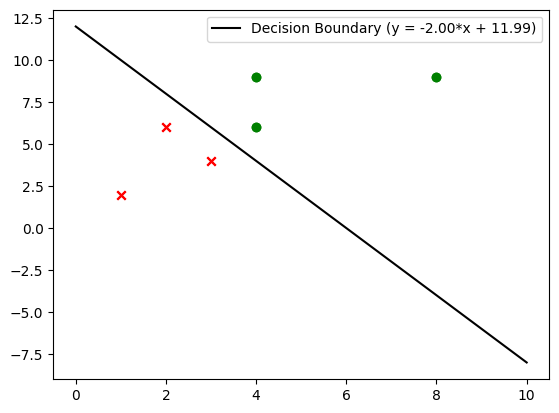

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# dataset
x = np.array([[1, 2], [4, 6], [8, 9], [3, 4], [2, 6], [4, 9]])
y = np.array([0, 1, 1, 0, 0, 1])

for i in range(y.shape[0]):
    if y[i] == 0:
        plt.scatter(x[i][0], x[i][1], color='red', marker='x')
    else:
        plt.scatter(x[i][0], x[i][1], color='green', marker='o')

# Task 1
kernel_used = 'linear'
Classifier = SVC(gamma='auto', kernel=kernel_used)
Classifier.fit(x, y)

# Task 1
weight_matrix = Classifier.coef_[0]
slope = -weight_matrix[0] / weight_matrix[1]
bias = -Classifier.intercept_[0] / weight_matrix[1]
val = np.linspace(0, 10)
boundary = slope * val + bias

# equation for the decision boundary 
plt.plot(val, boundary, 'k', label=f"Decision Boundary (y = {slope:.2f}*x + {bias:.2f})")

for i in range(y.shape[0]):
    if y[i] == 0:
        plt.scatter(x[i][0], x[i][1], color='red', marker='x')
    else:
        plt.scatter(x[i][0], x[i][1], color='green', marker='o')

plt.legend()
plt.show()


## Non - Linear SVM

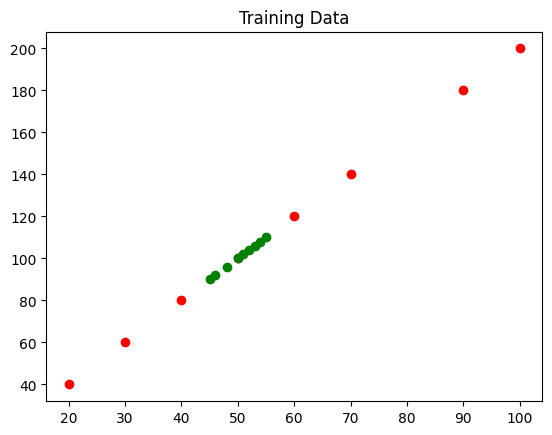

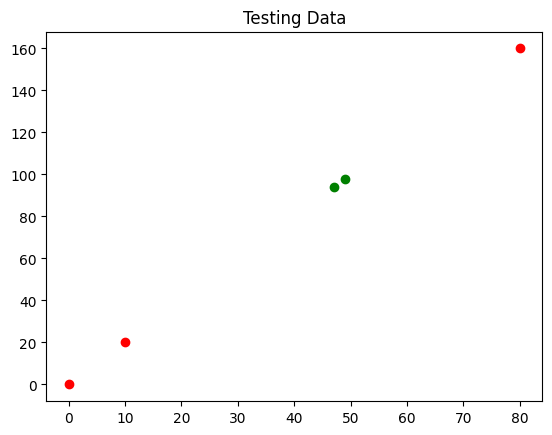

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_red = np.array([
    [0, 0], [10, 20], [20, 40], [30, 60], [40, 80],
    [50, 100], [60, 120], [70, 140], [80, 160], [90, 180], [100, 200]
])
Y_red = np.array([0] * len(X_red))

X_green = np.array([
    [45, 90], [46, 92], [47, 94], [48, 96], [49, 98],
    [50, 100], [51, 102], [52, 104], [53, 106], [54, 108], [55, 110]
])
Y_green = np.array([1] * len(X_green))


X = np.vstack((X_red, X_green))
Y = np.hstack((Y_red, Y_green))

# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Visualizing training data
for i in range(X_train.shape[0]):
    if Y_train[i] == 1:
        plt.scatter(X_train[i][0], X_train[i][1], color="green")
    else:
        plt.scatter(X_train[i][0], X_train[i][1], color="red")
plt.title('Training Data')
plt.show()

# Visualizing testing data
for i in range(X_test.shape[0]):
    if Y_test[i] == 1:
        plt.scatter(X_test[i][0], X_test[i][1], color="green")
    else:
        plt.scatter(X_test[i][0], X_test[i][1], color="red")
plt.title('Testing Data')
plt.show()


## Non - Linear Classifier

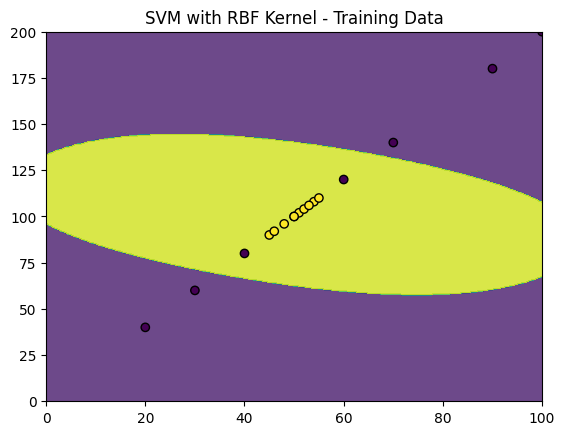

In [3]:
from sklearn.svm import SVC

classifier = SVC(kernel='rbf', gamma='scale')
classifier.fit(X_train, Y_train)

xx, yy = np.meshgrid(np.linspace(0, 100, 500), np.linspace(0, 200, 500))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolors='k', marker='o')
plt.title('SVM with RBF Kernel - Training Data')
plt.show()
